#### Import Packages

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup as bs
import datetime

pd.options.mode.chained_assignment = None  # default='warn'

#### Load data

In [123]:
movies = pd.read_csv("./Marvel_DC.csv")

In [124]:
#Formart Release Year
movies["Release Year"] = movies["Release Year"].apply(lambda x: datetime.datetime.strptime(str(x),\
                                                                                           "%Y").year)

#### Average Ratings and Revenue  by Universe

In [126]:
movies.groupby(["Universe"])[["IMDB Rating", "Metascore","Running Time (minutes)",\
                              "Domestic Revenue"]].agg(np.mean)

,IMDB Rating,Metascore,Running Time (minutes),Domestic Revenue
Universe,,,,
DC,6.341379,55.551724,126.103448,1.824366e+08
Marvel,6.898246,59.298246,122.456140,2.494163e+08


In [89]:
df = movies[["Release Year","IMDB Rating","Metascore","Domestic Revenue","Universe"]]
df = df.set_index('Release Year')
df_marvel = df[df["Universe"]=="Marvel"]
df_dc = df[df["Universe"]=="DC"]

In [197]:
df = movies[["Release Year","Title","IMDB Rating","Metascore","Domestic Revenue","Universe"]]

df_marvel = df[df["Universe"]=="Marvel"]
df_marvel = df_marvel.drop(columns="Universe")
df_marvel = df_marvel.groupby("Release Year").agg(np.mean)

df_dc = df[df["Universe"]=="DC"]
df_dc = df_dc.drop(columns="Universe")
df_dc = df_dc.groupby("Release Year").agg(np.mean)

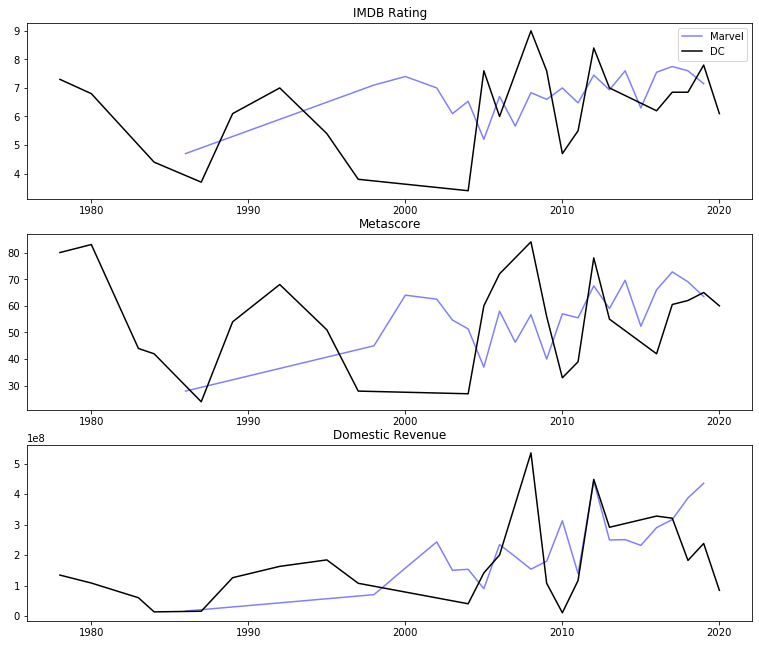

In [198]:
fig, ax = plt.subplots(3,1,figsize=(13,11))

ax[0].plot(df_marvel["IMDB Rating"],color="blue", alpha=0.5,label="Marvel")
ax[0].plot(df_dc["IMDB Rating"],color="black",label="DC")
ax[0].legend(loc="best")
ax[0].set_title("IMDB Rating")

ax[1].plot(df_marvel["Metascore"],color="blue", alpha=0.5,label="Marvel")
ax[1].plot(df_dc["Metascore"],color="black",label="DC")
ax[1].set_title("Metascore")

ax[2].plot(df_marvel["Domestic Revenue"],color="blue", alpha=0.5,label="Marvel")
ax[2].plot(df_dc["Domestic Revenue"],color="black",label="DC")
ax[2].set_title("Domestic Revenue");

#### Number Of Movies Released Before and After 2000 By Universe

In [199]:
number_of_movies_by_period = pd.crosstab(movies["Universe"],movies["Release Year"]>2000,margins=True,\
                                         margins_name="Total")
number_of_movies_by_period.rename(columns={False:"before 2000",True:"After 2000"})

Release Year,before 2000,After 2000,Total
Universe,,,
DC,10,19,29
Marvel,3,54,57
Total,13,73,86


#### Total Number Of Movies By Year and Universe Visualization 

In [227]:
count_movies_by_year_marvel = df[df["Universe"]=="Marvel"]
count_movies_by_year_marvel = count_movies_by_year_marvel.drop(columns="Universe")[["Release Year",\
                                                            "Title"]].groupby("Release Year").count()
count_movies_by_year_marvel = count_movies_by_year_marvel.rename(columns={"Title":"Count"})

count_movies_by_year_dc = df[df["Universe"]=="DC"]
count_movies_by_year_dc = count_movies_by_year_dc.drop(columns="Universe")[["Release Year",\
                                                            "Title"]].groupby("Release Year").count()
count_movies_by_year_dc = count_movies_by_year_dc.rename(columns={"Title":"Count"})

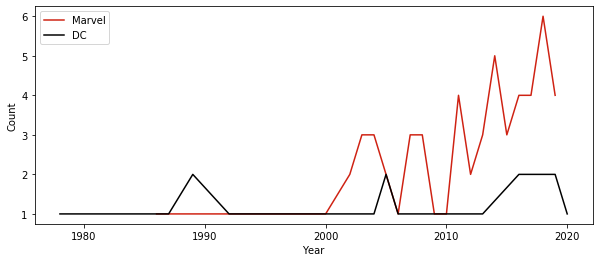

In [235]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(count_movies_by_year_marvel,color="#cf2213",label="Marvel" )
ax.plot(count_movies_by_year_dc,color="#000000",label="DC")
ax.legend(loc="best")
ax.set_xlabel("Year")
ax.set_ylabel("Count");

#### Top 5 Highest Domestic Revenue Movies by Universe

In [269]:
highest_gross=df.sort_values(by="Domestic Revenue",ascending=False).groupby("Universe").nth((0,1,2,3,4))
highest_gross["Domestic Revenue"] = highest_gross["Domestic Revenue"].apply(lambda x: "${:,.0f}".format(x))
highest_gross.sort_values(by=["Universe","Domestic Revenue"], ascending=False)

,Release Year,Title,IMDB Rating,Metascore,Domestic Revenue
Universe,,,,,
Marvel,2019,Avengers: Endgame,8.4,78.0,"$858,370,000"
Marvel,2018,Black Panther,7.3,88.0,"$700,060,000"
Marvel,2018,Avengers: Infinity War,8.4,68.0,"$678,820,000"
Marvel,2012,The Avengers,8.0,69.0,"$623,280,000"
Marvel,2015,Avengers: Age of Ultron,7.3,66.0,"$459,010,000"
DC,2008,The Dark Knight,9.0,84.0,"$534,860,000"
DC,2012,The Dark Knight Rises,8.4,78.0,"$448,140,000"
DC,2017,Wonder Woman,7.4,76.0,"$412,560,000"
DC,2019,Joker,8.5,59.0,"$335,450,000"


#### Top Grossing Movie by Year

In [334]:
top_gross_by_year = df[df.groupby("Release Year")["Domestic Revenue"].transform(max)\
                       == df['Domestic Revenue']].sort_values(by = "Release Year",ascending =False)
top_gross_by_year["Domestic Revenue"] = top_gross_by_year["Domestic Revenue"].apply(lambda x:\
                                                                                    "${:,.0f}".format(x))
top_gross_by_year =  top_gross_by_year.reset_index(drop=True, inplace=False)
top_gross_by_year.head(32)

,Release Year,Title,IMDB Rating,Metascore,Domestic Revenue,Universe
0,2020,Birds of Prey: And the Fantabulous Emancipatio...,6.1,60.0,"$84,160,000",DC
1,2019,Avengers: Endgame,8.4,78.0,"$858,370,000",Marvel
2,2018,Black Panther,7.3,88.0,"$700,060,000",Marvel
3,2017,Wonder Woman,7.4,76.0,"$412,560,000",DC
4,2016,Captain America: Civil War,7.8,75.0,"$408,080,000",Marvel
5,2015,Avengers: Age of Ultron,7.3,66.0,"$459,010,000",Marvel
6,2014,Guardians of the Galaxy,8.0,76.0,"$333,180,000",Marvel
7,2013,Iron Man Three,7.2,62.0,"$409,010,000",Marvel
8,2012,The Avengers,8.0,69.0,"$623,280,000",Marvel
9,2011,Thor,7.0,57.0,"$181,030,000",Marvel


#### Most Appearances by Actor 

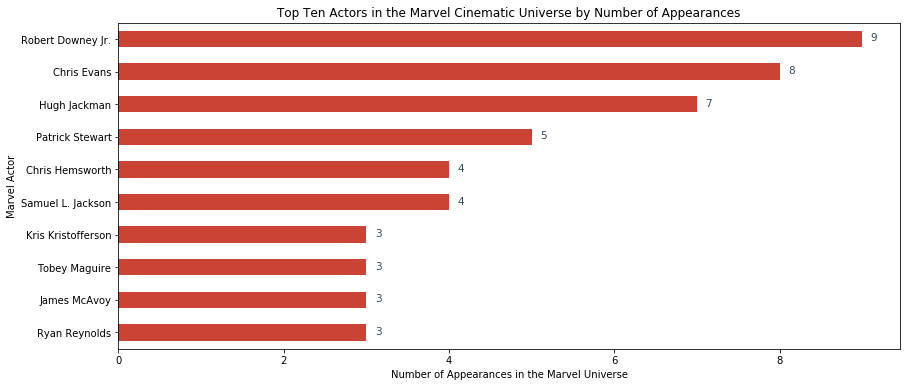

In [24]:
#Most appearance in Marvel movies in a star role
marvel_df_stars = pd.concat([df_marvel["Stars"].str.split(",",expand=True)[0],df_marvel["Stars"]\
                             .str.split(",",expand=True)[1],df_marvel["Stars"].str.split(",",expand=True)\
                             [2]],axis=0)
marvel_df_stars = marvel_df_stars.str.strip()

#Plot
plt.rcParams["figure.figsize"]=(14,6)
ax = marvel_df_stars.value_counts(sort=True).nlargest(10).plot(kind='barh',color="#CB4335" )
plt.gca().invert_yaxis()
plt.ylabel("Marvel Actor")
plt.xlabel("Number of Appearances in the Marvel Universe")
plt.title("Top Ten Actors in the Marvel Cinematic Universe by Number of Appearances")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 10)), fontsize=10.5, color="#34495E")

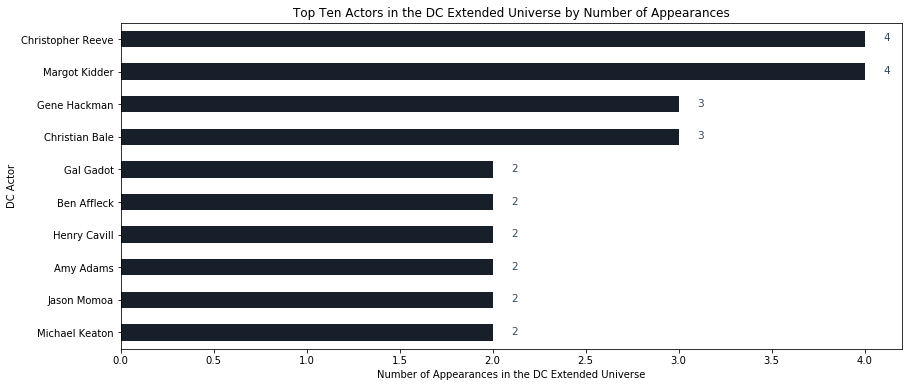

In [25]:
#Most appearance in Marvel movies in a star role
dc_df_stars = pd.concat([df_dc["Stars"].str.split(",",expand=True)[0],df_dc["Stars"].str.split(",",\
                               expand=True)[1],df_dc["Stars"].str.split(",",expand=True)[2]],axis=0)
dc_df_stars = dc_df_stars.str.strip()

#Plot
plt.rcParams["figure.figsize"]=(14,6)
ax = dc_df_stars.value_counts(sort=True).nlargest(10).plot(kind='barh',color="#17202A" )
plt.gca().invert_yaxis()
plt.ylabel("DC Actor")
plt.xlabel("Number of Appearances in the DC Extended Universe")
plt.title("Top Ten Actors in the DC Extended Universe by Number of Appearances")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 10)), fontsize=10.5, color="#34495E")